# **1. Pengumpulan Data**

Dataset dari https://archive.ics.uci.edu/dataset/45/heart+disease dengan file "Cleveland.data"

# **2. Menelaah Data**

In [55]:
import pandas as pd #membantu dalam membuat DataFrame
import numpy as np #membantu dalam hitungan matematika
import re #memproses teks dengan pola tertentu
import itertools #membantu dalam membuat iterasi
import seaborn as sns #membantu membuat heatmap
import matplotlib.pyplot as plt #membantu membuat grafik
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# import pickle

In [56]:
#menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive/')

#menggunakan file data yang diperlukan
dir = ('/content/drive/MyDrive/Colab Notebooks/Bimbingan Karir/Cleveland/cleveland.data')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [57]:
#membuat iterasi dalam membaca dataset

with open(dir, encoding='Latin1') as file: #buka file dir
  lines = [line.strip() for line in file] #membaca setiap baris, menghilangkan whitespace, menyimpan variabel

lines[0:10] #menampilkan daftar indeks dari 0-9

['1 0 63 1 -9 -9 -9',
 '-9 1 145 1 233 -9 50 20',
 '1 -9 1 2 2 3 81 0',
 '0 0 0 0 1 10.5 6 13',
 '150 60 190 90 145 85 0 0',
 '2.3 3 -9 172 0 -9 -9 -9',
 '-9 -9 -9 6 -9 -9 -9 2',
 '16 81 0 1 1 1 -9 1',
 '-9 1 -9 1 1 1 1 1',
 '1 1 -9 -9 name']

In [58]:
#membaca dataset sesuai dengan jumlah kolom dan baris yang ada

data = itertools.takewhile (
    #takewhile : mengambil elemen yang dibutuhkan yaitu 76 data
    lambda x: len(x) == 76,
    #menggabungkan 10 baris menjadi 1 string
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines),10))
)

#membuat DataFrame
df = pd.DataFrame(data)

#menghapus kolom terakhir
df = df.drop(75, axis=1)

#merubah tipe data menjadi float
df = df.astype(float)

#menampilkan 5 data pada DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1.0,0.0,63.0,1.0,-9.0,-9.0,-9.0,-9.0,1.0,145.0,...,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
1,2.0,0.0,67.0,1.0,-9.0,-9.0,-9.0,-9.0,4.0,160.0,...,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
2,3.0,0.0,67.0,1.0,-9.0,-9.0,-9.0,-9.0,4.0,120.0,...,-9.0,2.0,2.0,1.0,1.0,1.0,7.0,3.0,-9.0,-9.0
3,4.0,0.0,37.0,1.0,-9.0,-9.0,-9.0,-9.0,3.0,130.0,...,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
4,6.0,0.0,41.0,0.0,-9.0,-9.0,-9.0,-9.0,2.0,130.0,...,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0


In [59]:
#menampilkan informasi pada dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       282 non-null    float64
 1   1       282 non-null    float64
 2   2       282 non-null    float64
 3   3       282 non-null    float64
 4   4       282 non-null    float64
 5   5       282 non-null    float64
 6   6       282 non-null    float64
 7   7       282 non-null    float64
 8   8       282 non-null    float64
 9   9       282 non-null    float64
 10  10      282 non-null    float64
 11  11      282 non-null    float64
 12  12      282 non-null    float64
 13  13      282 non-null    float64
 14  14      282 non-null    float64
 15  15      282 non-null    float64
 16  16      282 non-null    float64
 17  17      282 non-null    float64
 18  18      282 non-null    float64
 19  19      282 non-null    float64
 20  20      282 non-null    float64
 21  21      282 non-null    float64
 22  22

# **3. Validasi Data**

In [60]:
#memahami isi dataset
#mengubah nilai -9.0 menjadi nilai Null

df.replace(-9.0, np.nan, inplace=True)

In [61]:
#menghitung nilai Null yang ada
df.isnull().sum()

0       0
1       0
2       0
3       0
4     282
     ... 
70      0
71      0
72      0
73    282
74    282
Length: 75, dtype: int64

In [62]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1.0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,2.0,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,3.0,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,4.0,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,6.0,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       282 non-null    float64
 1   1       282 non-null    float64
 2   2       282 non-null    float64
 3   3       282 non-null    float64
 4   4       0 non-null      float64
 5   5       0 non-null      float64
 6   6       0 non-null      float64
 7   7       0 non-null      float64
 8   8       282 non-null    float64
 9   9       282 non-null    float64
 10  10      282 non-null    float64
 11  11      282 non-null    float64
 12  12      0 non-null      float64
 13  13      277 non-null    float64
 14  14      277 non-null    float64
 15  15      282 non-null    float64
 16  16      23 non-null     float64
 17  17      282 non-null    float64
 18  18      282 non-null    float64
 19  19      282 non-null    float64
 20  20      282 non-null    float64
 21  21      282 non-null    float64
 22  22

# **4. Menentukan Fitur Data**



In [64]:
#mengambil kolom yang digunakan sebagai fitur
df_selected = df.iloc[:,[2, 3, 8, 9, 11, 15, 18, 31, 37, 39, 40, 43, 50, 57]]

#mengubah nama kolom
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target',
}

df_selected.rename(columns=column_mapping, inplace=True)
df_selected.head()

<ipython-input-64-6d76a2d668a6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [65]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   fbs       282 non-null    float64
 6   restecg   282 non-null    float64
 7   thalach   282 non-null    float64
 8   exang     282 non-null    float64
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    float64
 11  ca        280 non-null    float64
 12  thal      280 non-null    float64
 13  target    282 non-null    float64
dtypes: float64(14)
memory usage: 31.0 KB


# **5. Membersihkan Data**

proses ini mengisi nilai null value (nan) dengan nilai rata-rata setiap kolom. Kemudian data dibersihkan dari data yang duplikat

In [66]:
df_selected.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

In [67]:
#mengubah nilai null menjadi nilai rata-rata
meanCa = round(df_selected.ca.dropna().mean())
meanThal = round(df_selected.thal.dropna().mean())

In [68]:
#memasukan nilai rata-rata kedalam variabel yang masih kosong
mean_values = {
    'ca' : meanCa,
    'thal' : meanThal,
}

df_cleaned = df_selected.fillna(value=mean_values)
df_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [69]:
df_cleaned.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [70]:
#menghapus nilai duplikat
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


# **6. Konstruksi Data**

Data dikonstruksi berdasarkan fitur korelasi yang ada. Berdasarkan fitur korelasi tidak diperlukan adanya penambahan fitur/ penggabungan fitur untuk meningkatkan efektifitas dari data.

<Axes: >

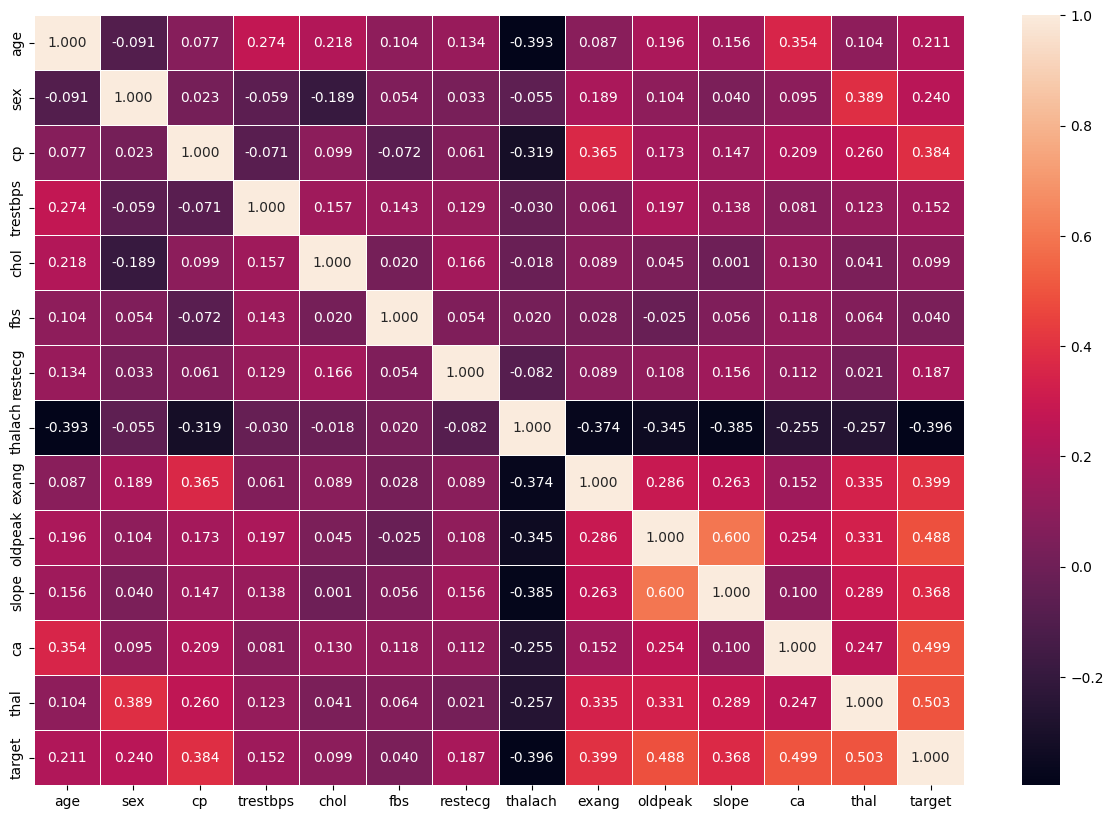

In [71]:
cor_mat = df_cleaned.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

matrix ini bacanya gimana?

# **7. Menentukan Label Data**

pada dokumentasi, label dari dataset berada di kolom 58. Terdapat 5 label yaitu 0,1,2,3,4.


---


persebaran label tidak merata, bisa dilakukan oversampling /undersampling / hybrid (undersampling dan oversampling), maka diperlukan oversampling karena bertujuan meningkatkan jumlah sampel dalam kelas minoritas sehingga keseimbangan antara kelas-kelas tersebut dapat dicapai.



---


proses ini melakukan oversampling dengan SMOTE (Synthetic Minority Over-sampling Technique): Membuat sampel sintetis baru dengan mengambil kombinasi linear dari sampel-sampel yang sudah ada dalam kelas minoritas.

In [72]:
# X : mengambil semua kolom df_cleaned kecuali kolom target
X = df_cleaned.drop("target",axis=1).values

# y : mengambil kolom terakhir (target) dengan iloc[:,-1] yg berarti mengambil semua baris kolom terakhir
y = df_cleaned.iloc[:,-1]

Target digunakan untuk?

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: target, dtype: int64


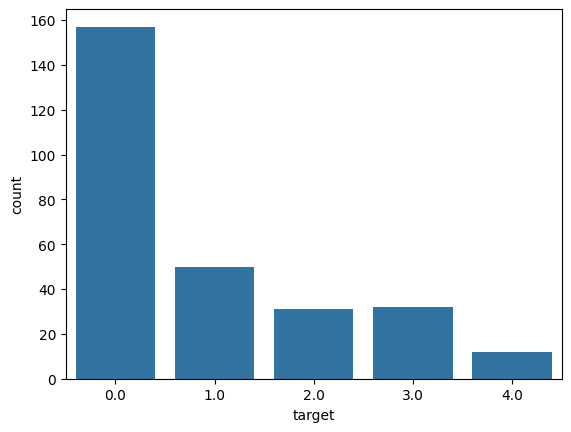

In [73]:
print(df_cleaned['target'].value_counts())

sns.countplot(x="target", data=df_cleaned)
plt.show()

In [74]:
# oversampling
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

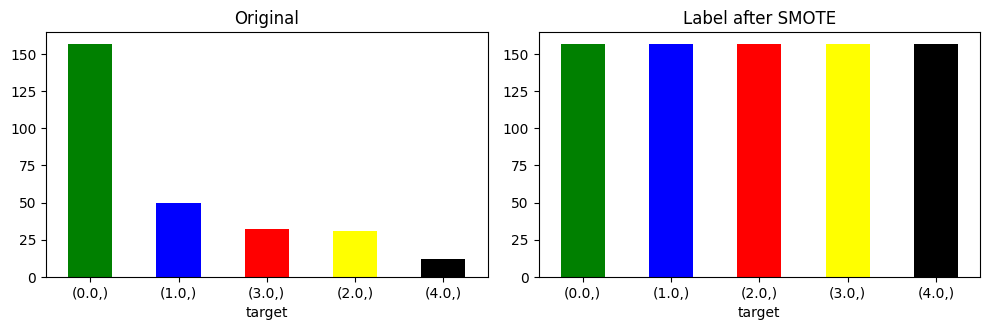

In [101]:
plt.figure(figsize=(12, 12))

# Subplot 1
plt.subplot(2, 2, 1)
label = pd.DataFrame(data=y)
label.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Original")
plt.xticks(rotation=0)

# Subplot 3
plt.subplot(2, 2, 2)
label_tomekLinks = pd.DataFrame(data=y_smote)
label_tomekLinks.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Label after SMOTE")
plt.xticks(rotation=0)
plt.tight_layout()

In [76]:
temp = pd.DataFrame(X_smote)

# mengetahui nilai statistik pada data
temp.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,56.111135,0.792210,3.463144,133.682667,250.788311,0.161309,1.212382,141.258923,0.482140,1.501620,1.777091,1.039218,5.512238
std,7.815690,0.370126,0.815963,16.113605,47.417130,0.323748,0.885667,21.554866,0.444757,1.140348,0.515260,0.939554,1.680228
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,51.067959,0.741984,3.000000,122.404689,216.607387,0.000000,0.000000,125.346764,0.000000,0.500000,1.272308,0.000000,3.479045
50%,57.000000,1.000000,4.000000,132.000000,248.610675,0.000000,1.824867,142.000000,0.456387,1.400000,2.000000,1.000000,6.337455
75%,61.155864,1.000000,4.000000,142.375699,282.669227,0.000000,2.000000,158.587470,1.000000,2.334114,2.000000,1.853500,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


pada dataframe diatas terdapat rentang nilai yang cukup jauh pada standar deviasi (standar deviasi : mengukur seberapa jauh nilai-nilai tersebar dari  rata-rata) setiap fitur dataset.

diperlukan normalisasi agar memperkecil rentang antara standar deviasi setiap kolom.

**MinMaxScaler** :
Tujuan: Mengubah nilai-nilai dalam suatu fitur sehingga berada dalam rentang tertentu, umumnya 0 hingga 1.
Proses: Mengurangkan nilai dengan nilai minimum fitur dan kemudian membaginya dengan selisih antara nilai maksimum dan minimum.
Contoh: Jika nilai minimum suatu fitur adalah 10, maksimumnya 50, dan nilai aslinya adalah 30, MinMaxScaler akan mengubahnya menjadi (30-10) / (50-10) = 0.5.

**StandartScaler** :  
Tujuan: Mengubah distribusi nilai dalam suatu fitur sehingga memiliki rata-rata 0 dan deviasi standar 1.
Proses: Mengurangkan setiap nilai dengan rata-rata fitur dan kemudian membaginya dengan deviasi standar fitur.
Contoh: Jika nilai rata-rata suatu fitur adalah 50, deviasi standarnya adalah 10, dan nilai aslinya adalah 70, StandardScaler akan mengubahnya menjadi (70-50) / 10 = 2.



**Standarisasi/ Normalisasi**

In [77]:
scaler = MinMaxScaler()
X_smote = scaler.fit_transform(X_smote)

**fit**: Digunakan untuk menghitung dan menyimpan rata-rata dan deviasi standar dari setiap fitur pada dataset pelatihan.

**transform**: Digunakan untuk mengubah nilai-nilai pada dataset menggunakan rata-rata dan deviasi standar yang sudah dihitung oleh fit.

**fit_transform**: Kombinasi dari fit dan transform. Digunakan untuk menghitung rata-rata dan deviasi standar dari dataset pelatihan, dan sekaligus mengaplikasikan transformasi (mengubah dan menggunakan nilai fit yg sudah dihitung) pada dataset tersebut.

In [78]:
temp = pd.DataFrame(X_smote)
temp.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.564815,0.792210,0.821048,0.374365,0.284905,0.161309,0.606191,0.536328,0.482140,0.242197,0.388545,0.346406,0.628059
std,0.162827,0.370126,0.271988,0.152015,0.108258,0.323748,0.442833,0.164541,0.444757,0.183927,0.257630,0.313185,0.420057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.459749,0.741984,0.666667,0.267969,0.206866,0.000000,0.000000,0.414861,0.000000,0.080645,0.136154,0.000000,0.119761
50%,0.583333,1.000000,1.000000,0.358491,0.279933,0.000000,0.912433,0.541985,0.456387,0.225806,0.500000,0.333333,0.834364
75%,0.669914,1.000000,1.000000,0.456375,0.357692,0.000000,1.000000,0.668607,1.000000,0.376470,0.500000,0.617833,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **7. Membangun Model**

terdapat 4 algoritma yang digunakan yaitu knn, svm, decision tree, dan random forest. Sebelum model dibagun data dibagi 80% untuk training dan 20% untuk testing.

pembagian tersebut dikarena untuk mengurangi hasil program dari underfitting dikarena representasi dataset yg kurang saat training dan testingnya

In [79]:
#membagi fitur dan target menjadi data train dan test untuk oversample saja
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#membagi fitur dan target menjadi data train dan test untuk oversample dan normalisasi
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42,stratify=y_smote)

# **KNN**

**Training Model**

In [80]:
#oversample
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

#oversample + normalisasi
knn_model_smote = KNeighborsClassifier(n_neighbors = 3)
knn_model_smote.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=3)

**Testing Model**

In [81]:
#oversample
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy KNN Original Dataset:", accuracy_knn)

#oversample + normalisasi
y_pred_knn_smote = knn_model_smote.predict(X_test_smote)
accuracy_knn_smote = round(accuracy_score(y_test_smote,y_pred_knn_smote),3)
print("Accuracy KNN SMOTE Dataset:", accuracy_knn_smote)

Accuracy KNN Original Dataset: 0.544
Accuracy KNN SMOTE Dataset: 0.809


In [82]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Classification Report SMOTE:")
print(classification_report(y_test_smote, y_pred_knn_smote))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.91      0.76        32
         1.0       0.18      0.20      0.19        10
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.54        57
   macro avg       0.17      0.22      0.19        57
weighted avg       0.40      0.54      0.46        57

Classification Report SMOTE:
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77        32
         1.0       0.71      0.71      0.71        31
         2.0       0.82      0.90      0.86        31
         3.0       0.78      0.78      0.78        32
         4.0       0.91      0.94      0.92        31

    accuracy                           0.81       157
   macro avg       0.81      0.81      0.81       157
weighted avg       0.81  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **SVM**

**Training Model**

In [83]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_model_smote = SVC()
svm_model_smote.fit(X_train_smote, y_train_smote)

SVC()

**Testing Model**

In [84]:
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = round(accuracy_score(y_test,y_pred_svm),3)
print("Accuracy SVM Original Dataset:", accuracy_svm)

y_pred_svm_smote = svm_model_smote.predict(X_test_smote)
accuracy_svm_smote = round(accuracy_score(y_test_smote,y_pred_svm_smote),3)
print("Accuracy SVM SMOTE Dataset:", accuracy_svm_smote)

Accuracy SVM Original Dataset: 0.561
Accuracy SVM SMOTE Dataset: 0.732


In [85]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Classification Report SMOTE:")
print(classification_report(y_test_smote, y_pred_svm_smote))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72        32
         1.0       0.00      0.00      0.00        10
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.56        57
   macro avg       0.11      0.20      0.14        57
weighted avg       0.32      0.56      0.40        57

Classification Report SMOTE:
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79        32
         1.0       0.65      0.48      0.56        31
         2.0       0.72      0.68      0.70        31
         3.0       0.71      0.69      0.70        32
         4.0       0.78      1.00      0.87        31

    accuracy                           0.73       157
   macro avg       0.73      0.73      0.72       157
weighted avg       0.73  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Decision Tree**

**Training Model**

In [86]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_model_smote = DecisionTreeClassifier()
dt_model_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

**Testing Model**

In [87]:
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = round(accuracy_score(y_test, y_pred_dt),3)
print("Accuracy Decision Tree Original Dataset : ", accuracy_dt)

y_pred_dt_smote = dt_model.predict(X_test_smote)
accuracy_dt_smote = round(accuracy_score(y_test_smote, y_pred_dt_smote),3)
print("Accuracy Decision Tree Original SMOTE Dataset : ", accuracy_dt)

Accuracy Decision Tree Original Dataset :  0.491
Accuracy Decision Tree Original SMOTE Dataset :  0.491


In [88]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


print("Classification Report SMOTE:")
print(classification_report(y_test_smote, y_pred_dt_smote))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73        32
         1.0       0.22      0.20      0.21        10
         2.0       0.11      0.17      0.13         6
         3.0       0.40      0.29      0.33         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.49        57
   macro avg       0.30      0.27      0.28        57
weighted avg       0.52      0.49      0.50        57

Classification Report SMOTE:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        32
         1.0       0.00      0.00      0.00        31
         2.0       0.00      0.00      0.00        31
         3.0       0.20      1.00      0.34        32
         4.0       0.00      0.00      0.00        31

    accuracy                           0.20       157
   macro avg       0.04      0.20      0.07       157
weighted avg       0.04  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Random Forest**

In [89]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_model_smote = RandomForestClassifier()
rf_model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [90]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = round(accuracy_score(y_test,y_pred_rf),3)
print("Accuracy Decision Tree Original Dataset:", accuracy_rf)

y_pred_rf_smote = rf_model_smote.predict(X_test_smote)
accuracy_rf_smote = round(accuracy_score(y_test_smote,y_pred_rf_smote),3)
print("Accuracy Decision Tree Random Under Sampling Dataset:", accuracy_rf_smote)

Accuracy Decision Tree Original Dataset: 0.649
Accuracy Decision Tree Random Under Sampling Dataset: 0.936


In [91]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Classification Report SMOTE:")
print(classification_report(y_test_smote, y_pred_rf_smote))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86        32
         1.0       0.50      0.40      0.44        10
         2.0       0.25      0.17      0.20         6
         3.0       0.25      0.14      0.18         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.65        57
   macro avg       0.35      0.34      0.34        57
weighted avg       0.58      0.65      0.60        57

Classification Report SMOTE:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93        32
         1.0       0.93      0.87      0.90        31
         2.0       0.90      0.90      0.90        31
         3.0       0.97      0.94      0.95        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.94       157
   macro avg       0.94      0.94      0.94       157
weighted avg       0.94  

# **8. Evaluasi**

setelah model selesai dibuat, selanjutnya mengevaluasi hasil setiap model dan menentukan metode dan model yang mendapatkan akurasi terbaik.

In [92]:
models =['KNN', 'SVM', 'DT', 'RF']
accuracy_original = [accuracy_knn*100, accuracy_svm*100, accuracy_dt*100, accuracy_rf*100]
accuracy_smote = [accuracy_knn_smote*100, accuracy_svm_smote*100, accuracy_dt_smote*100, accuracy_rf_smote*100]

data = {
    'Accuracy Original' : accuracy_original,
    'Accuracy SMOTE' : accuracy_smote
}

result_df = pd.DataFrame(data, index=models)
result_df

,Accuracy Original,Accuracy SMOTE
KNN,54.4,80.9
SVM,56.1,73.2
DT,49.1,20.4
RF,64.9,93.6


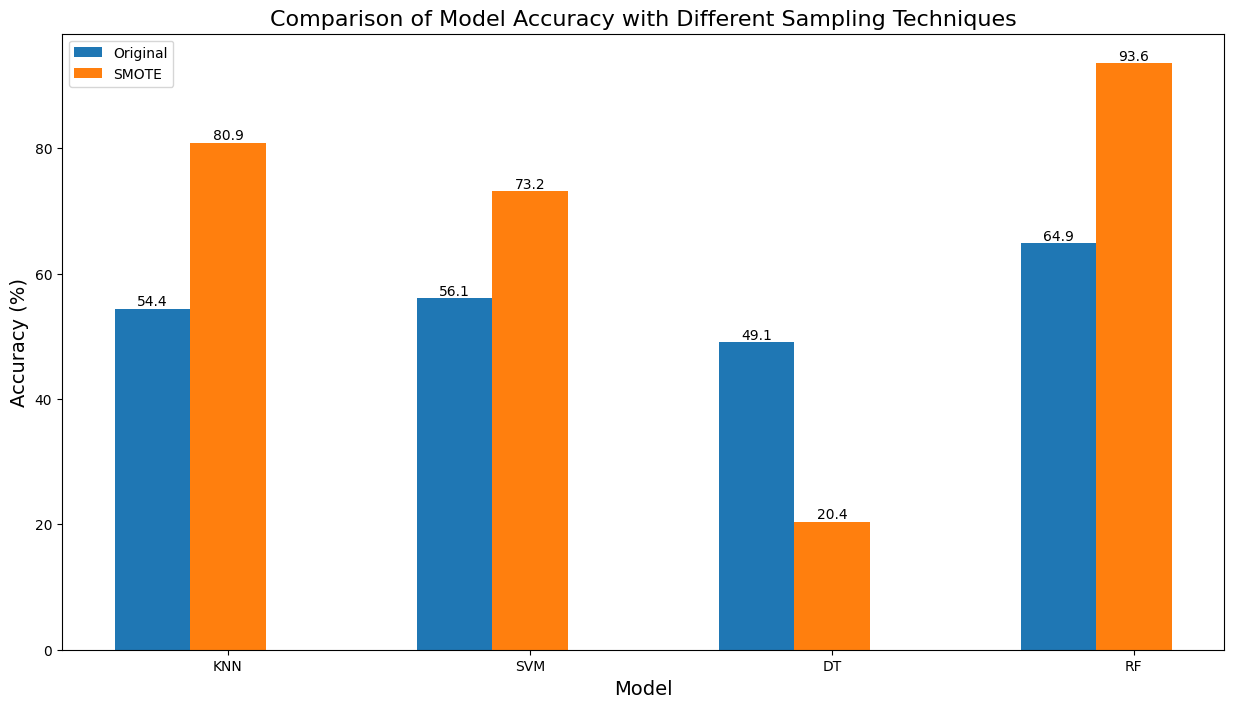

In [97]:
bar_width = 0.25
index = range(len(models))

fig, ax = plt.subplots(figsize=(15, 8))

bar1 = ax.bar(index, accuracy_original, bar_width, label='Original')
bar2 = ax.bar([i + bar_width for i in index], accuracy_smote, bar_width, label='SMOTE')

ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Comparison of Model Accuracy with Different Sampling Techniques', fontsize=16)
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()

# **9. Kesimpulan**

kesimpulan pada penggunaan data original dengan data yang sudah di normalisasi, sebgai berikut :  
- Original data:

  memiliki rentang akurasi di 50%-60% hal ini dikarenakan persebaran kelas yang tidak stabil. Model Random Forest mendapatkan akurasi tertinggi di 64.9%

- Smote data

  hasil peningkatan akurasi lumayan signifikan meningkat dari hasil meratakan penyebaran data. Model Random Forest mendapatkan akurasi tertingi di 93.6%

Seluruh model memiliki akurasi yang baik setelah melakukan normalisasi dengan menggunakan SMOTE. hal ini dikarenakan persebaran kelas yang merata (balance), sehingga informasi disetiap kelas menjadi sama banyak.

Model Random Forest memiliki akurasi yang unggul dari keseluruhan model.


